# Révision - Analyse de données sur les ventes d'une librairie

# 0 - contexte et objectifs

Vous travaillez au service marketing de Lapage, une grande librairie généraliste en ligne.

Lapage était originellement une librairie physique avec plusieurs points de vente.
Mais devant le succès de certains de ses produits et l’engouement de ses clients,
elle a décidé depuis 2 ans d’ouvrir un site de vente en ligne. Vous intervenez car l’entreprise souhaite faire le point : analyser ses points forts, ses points faibles, les comportements clients, etc. Par exemple, elle cherche à savoir si elle doit créer certaines offres, adapter certains prix, etc.

On vous demande de faire une analyse en deux parties :

Partie I - analyse des différents indicateurs généraux

    Construire des indicateurs et graphiques autour du chiffre d'affaires. Rregarder l’évolution dans le temps
    faire un zoom sur les références, pour voir les tops et les flops, la répartition par catégorie, etc.
    etudier les profils des clients, et également la répartition du chiffre d'affaires entre eux

Partie II - comportement des clients l’objectif est cette fois-ci de comprendre le comportement des clients en ligne.

    étudier le lien entre le genre d’un client et les catégories des livres achetés
    étudier ensuite le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés.



# 1 - Exploration et  nettoyage des données

In [21]:
# Import de la librairie Pandas
import pandas as pd

# Import de la librairie matplotlib
import matplotlib.pyplot as plt

## 1.1 - Chargement des données

Si vous utilisez anaconda -> je vous conseille de mettre les fichiers csv dans le même répertoire que le notebook

Si vous utilisez google colab ->  il faut exécuter le code ci-dessous.

from google.colab import files
data_to_load = files.upload()

### 1.1.1 - customers

In [22]:
# Ouverture du fichier
customers = pd.read_csv('customers.csv')

In [23]:
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [24]:
# Affichage des informations
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [25]:
# Affichage des premières lignes

customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [26]:
# Stats du dataframe
customers.describe(include = 'all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


Ce fichier comprend 3 colonnes :

    Client_id : référence de chaque client
    Sex : le genre du client
    Birth : l'année de naissance du client



In [27]:
#valeurs manquantes
customers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [28]:
#Doublon
customers.duplicated().sum()

0

In [29]:
print("Il y a", customers.describe(include = 'all').loc["unique","client_id"], "clients uniques")

Il y a 8623 clients uniques


In [30]:
print("L'age moyen est :", 2023 - round(customers.describe(include = 'all').loc["mean","birth"]), "ans")

L'age moyen est : 45 ans


In [31]:
print("La part des femmes :", round(customers.describe(include = 'all').loc["freq","sex"] /
      customers.describe(include = 'all').loc["count","sex"],2)*100, "%")

La part des femmes : 52.0 %


In [32]:
#calculons l'age moyen par sexe

2023 - customers.groupby("sex")["birth"].mean()

sex
f    45.005121
m    44.408277
Name: birth, dtype: float64

Le fichier customers n'a pas de valeurs nulles ni de doublons.


### 1.1.2 - products

In [33]:
# Ouverture du fichier

products = pd.read_csv('products.csv')

In [34]:
# Affichage des informations

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [35]:
# Affichage des premières lignes

products.head(20)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
5,0_1163,9.99,0
6,1_463,36.99,1
7,0_2157,34.99,0
8,0_1915,16.99,0
9,0_389,18.99,0


In [36]:
#valeurs manquantes

products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [37]:
#Doublon
products.duplicated().sum()


0

In [38]:
# Stats du dataframe

products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [39]:
products[products.price <0 ]

,id_prod,price,categ
731,T_0,-1.0,0


Votre conclusion ?



In [40]:
# calculer le prix moyen des produits par catégorie

In [41]:
products.mean()

TypeError: Could not convert ['0_14210_13680_7311_5870_15070_11631_4630_21570_19150_3892_2281_1781_1431_3140_19380_12320_22540_17130_8350_13890_8530_21311_2590_10701_5041_3701_7160_15050_22930_4310_4350_21201_5320_17950_6680_11661_6381_5492_1000_970_20610_16191_7071_4570_13171_2510_13210_16291_1241_480_22880_4980_7960_19490_18490_6860_7940_4451_2551_6650_12400_15300_5700_21882_890_19390_18891_3390_11420_22990_10800_19120_12472_2250_11920_20350_5480_13921_1742_1871_650_14462_460_20170_15090_19411_3330_19840_15491_1650_22891_7230_23050_2830_562_1280_8720_16350_3561_1070_2980_20312_2150_62_1510_6022_1762_1030_12650_260_8450_19601_6661_6910_15950_140_6872_1721_4820_5680_3810_390_11761_570_13800_18270_4711_4560_10690_21040_16710_11440_13700_16490_10561_2440_18952_1310_14800_9320_10130_12360_7490_20640_14230_12030_18330_5560_8311_501_2310_7900_21980_3761_3170_19231_1831_2640_20520_610_13320_2530_21890_3520_11020_1661_771_2840_22370_231_6491_981_2052_2140_18240_14310_22911_4471_2790_11770_21810_8081_7280_17750_10160_5010_22682_100_20830_20560_9920_15040_19691_5821_2211_4770_8230_23060_18992_710_21510_10930_1520_21641_4961_3851_560_860_15450_22760_5120_15960_12270_1122_781_5201_6981_5640_7930_11970_17721_3740_10750_1610_18320_19340_16941_6780_7150_11360_21171_3181_7080_1050_10281_4320_15460_19790_4360_3980_5132_2310_1930_2620_16392_1452_1651_491_6670_13230_18080_3062_10_21990_17440_15590_1040_4611_6560_5060_13150_11831_7330_1470_8960_11001_3620_10031_1540_22560_20241_4782_1390_21971_4700_640_16310_11480_1310_17800_13870_22330_8970_850_18040_21900_9061_1290_22832_2261_6860_20600_22670_15290_13931_7040_11102_1440_12090_14860_13611_6971_5030_10890_2071_2501_1382_1461_6050_14440_2720_4750_17210_3020_5471_2730_20710_10521_1960_13331_10_870_13881_6930_2221_4761_2770_22580_7841_1990_14010_22490_8470_10880_10811_891_840_12310_10090_20692_1640_14561_4910_10190_17241_1160_21501_1140_17831_4950_1340_11990_17331_6071_4460_18641_240_7260_11072_2302_341_2570_23020_13630_8520_4330_12980_22720_10311_3970_1201_2180_10220_17971_4420_5270_330_4120_15900_13970_21482_1270_19721_3070_9070_15230_13191_5860_22460_22922_450_12390_22190_16082_1581_5710_3720_16180_22280_7690_12900_18620_2580_21720_4640_3580_21620_5200_2780_11730_23001_3260_10530_17310_22810_19321_4101_2190_16220_10822_1370_9392_2010_15760_1020_15930_16470_12071_6940_7780_17920_22042_00_12670_7180_19711_1720_22821_5230_2450_8290_11110_12120_4400_22851_4210_21860_7421_4331_400_8130_5190_11242_1920_9110_22701_4990_20_8060_15820_3210_6170_17940_1031_2292_1120_17980_13401_2030_7000_10120_21630_16681_80_1180_22390_22220_9291_2410_7970_18071_1391_940_9850_4950_2491_850_9460_17772_540_18151_6102_2090_4001_4851_690_15640_5861_2701_5190_15710_3880_5712_2121_2860_13740_7740_8761_4612_1260_10460_12170_8220_21370_18830_18450_4220_16580_15730_11721_410_14842_831_7290_9630_18781_5480_16700_14070_19820_14701_3421_3001_3710_4080_14431_4380_5590_12020_21080_14220_12381_2260_9011_730_14680_14341_3080_9981_6460_8880_16910_11380_8870_21960_9670_670_2291_2661_2851_930_16002_1211_6090_6480_12560_13481_7170_8680_1972_1200_11740_3431_1360_8771_5020_16561_2650_15400_21180_18721_4480_9861_231_6290_4820_19540_22600_4210_6570_13980_11610_18020_16621_4712_371_2350_4140_7871_4812_2020_2480_1131_4190_19880_4440_7480_20971_7240_360_8111_5361_3510_16372_270_5020_21580_1271_4540_19781_6810_9362_1330_2891_6351_6710_15080_14120_20590_9790_7750_16870_13101_7111_6540_12930_11820_5111_3801_4870_16721_3960_16230_22632_1830_18711_2831_5370_111_7191_340_11941_3430_16110_11230_16841_1791_1150_180_21240_20770_1360_9910_1000_7600_11780_6290_10100_8491_3030_20260_22240_8500_10040_19021_5940_14610_19430_17391_1900_13071_6900_5440_16360_11490_2710_21380_900_20740_8160_10680_21280_9160_6391_3241_610_1451_1520_13380_14000_4860_12510_16592_310_22770_982_940_8030_8442_690_440_19160_20300_20190_13600_18361_5931_3601_6602_2230_5690_20980_280_1482_760_19330_13200_11450_16890_8260_219T_00_4070_7270_13650_8750_3960_10620_4510_11400_14621_4030_8991_3151_991_1221_3210_15940_1102_1880_13340_16410_9550_15482_1180_21430_1260_9530_15161_6190_6751_4501_2131_1281_4800_16261_3092_810_6910_16032_1070_3080_1960_7130_18340_12520_2600_20430_22470_12691_820_10830_20141_2811_970_16522_400_90_15260_20660_17680_6802_1470_19870_11190_11550_12301_4680_8730_5870_4630_21660_3330_10_22260_650_16150_5291_100_15780_23040_10140_12740_2360_7790_2630_2201_5530_21031_6440_1550_7830_7660_13441_130_6300_16460_7542_80_3241_6040_15280_10051_6160_1351_350_22351_2010_13420_11260_380_460_10500_8590_14361_7061_00_170_1801_3790_21840_17121_1682_1360_21410_9000_8360_15220_2640_15830_1811_5771_2800_13940_14890_18370_22340_19590_7210_190_20800_4460_9681_5911_2820_952_1821_3020_19751_6790_820_7101_6700_14300_921_4000_9260_5850_12050_16850_4960_11060_20922_470_5890_10940_20470_8200_20500_13670_2562_90_11900_2040_22972_160_18970_11680_6840_12040_11930_11120_10591_6740_14580_6951_5850_19472_530_14740_9242_820_10000_21520_4662_2331_5561_190_5510_11140_15380_2051_3662_1062_920_17300_18800_20791_70_20960_10570_18400_8150_11870_15671_7310_21692_21_60_5500_2180_8811_711_2391_6640_7982_1851_6960_22311_1810_1231_5111_5580_3830_590_4902_950_9050_16930_1622_50_5931_4090_12590_11310_1762_790_16130_6410_18811_681_2470_5331_40_19800_22750_13280_15500_13220_11090_15660_13290_21231_3380_8901_4181_90_882_320_2670_9300_00_16420_5780_6141_870_7850_11622_1952_2190_14372_1500_21601_2870_21190_8420_22170_7720_3630_22061_3720_17891_3560_9580_13510_4500_18860_2140_6210_13760_6640_13181_1590_5520_270_1302_361_6241_440_11950_2001_4250_11961_7121_3540_20380_9500_16650_16050_2840_16921_5240_16670_18530_10540_13361_6621_2490_9311_1531_7180_3480_570_11080_11370_17270_17030_18220_8320_1370_1900_10070_14552_1480_20911_6532_1970_14191_5130_9440_4702_610_810_11700_8331_1080_18410_17630_12810_5070_23070_18050_19030_21062_2181_5160_8671_5550_21550_11182_122_201_6220_1740_9600_17350_1770_6260_3500_22291_5151_5510_5640_13730_10550_21850_1392_1730_16090_20280_13301_910_17190_7030_3970_3270_3120_1940_12100_20571_2520_17100_20680_13250_10510_5210_20390_18121_1890_18000_19990_7910_12060_2910_7111_1370_19481_1480_2931_470_13660_7630_1540_8510_21800_9271_1021_2990_17640_9590_17010_8890_14731_5922_1550_10150_9800_18851_1420_15890_11410_12230_22901_2240_14330_14850_2871_5070_4250_18940_9940_20940_13791_1470_12620_2110_9760_19110_840_6440_20041_620_2680_3770_17380_18420_18160_5241_210_2470_2921_2630_21270_2691_5060_8610_10391_5410_21150_10060_11270_18442_2360_21820_1730_18510_19510_17651_740_18580_14720_15441_3910_770_15800_11881_5460_22160_21590_5051_5380_14110_12191_5730_1920_8910_16790_12730_19581_920_5960_12281_6852_1490_22591_6480_15650_7620_7410_14960_7710_4090_11201_6320_4620_12140_500_1720_22381_6750_17780_8950_2500_1530_14650_12871_4930_14032_2320_19000_13840_6382_70_2240_4530_17020_14570_8001_4730_2080_22230_2010_1910_19982_2110_17410_15630_15061_31_520_19360_13030_5750_20540_9200_21050_11290_9731_2371_1860_9510_14940_19400_22420_16550_15320_940_1951_1002_480_1110_17291_6420_9090_3802_1590_7701_3610_20481_5570_20371_5451_2302_1570_6980_11601_4071_1300_3040_4890_6080_12700_18030_1560_6770_10210_8401_1270_5160_5631_1330_10600_3900_7511_6250_13111_2750_16452_150_18281_7212_1780_6940_16401_3351_3980_12550_12610_10740_16280_4941_3930_7450_10840_8301_5791_7150_22500_5140_7070_5832_1900_11510_15420_10780_9471_2160_3691_4791_4601_3470_3410_19450_22150_4591_6630_8800_15150_1700_7462_641_6130_16980_4390_8780_18090_22271_3230_22620_4190_15250_11592_1680_11640_22051_3370_16880_10790_1060_20460_19052_1090_13850_20080_8010_6031_1461_1170_2310_19761_3841_6011_3280_30_620_17880_7650_22780_5000_12160_4050_6880_16271_111_3410_13782_1672_1240_3740_11860_18901_4550_930_9540_21560_12420_17511_1870_21940_7390_9700_960_17281_4890_14090_19070_12570_19850_7050_15180_18910_3400_550_10902_600_6740_3530_10440_21540_14170_1690_9451_1661_20_17170_6090_7640_11580_6270_11792_2061_5000_9420_11151_4260_2610_8041_3101_1130_10710_20670_12660_12110_22210_5301_530_10481_6610_9841_5950_14020_3600_3710_12212_1750_3221_1731_2540_12342_1790_2900_2391_7090_3290_10670_15571_3400_13411_5980_1380_19040_6130_10110_21261_2880_11690_2230_11801_2200_17560_16200_10861_1201_2920_10171_902_2050_7352_850_3050_5150_7400_21300_10250_3171_6180_3162_1600_8100_6061_4061_2460_20130_16611_760_490_17460_13040_1440_22360_20110_9751_2581_6230_10580_2430_20532_1130_3360_21012_1890_15431_2610_5370_10730_14911_4400_14160_14480_7760_5610_9350_5881_1180_3620_2420_6281_3290_781_4580_22120_4520_21680_12441_7350_1250_12720_20061_1501_5100_5810_3180_16801_5591_1940_13580_19900_14881_250_11170_8410_11571_721_2601_3460_22101_2120_2090_22180_7430_5840_8820_4650_7010_21531_5472_2370_3680_3700_11041_6361_1250_4230_3490_3260_20820_4560_11050_16691_6520_21730_14690_3780_18480_1490_5790_17001_170_5900_13710_1680_9870_6560_14400_13160_12130_19241_6880_1890_20450_1220_5260_21220_15680_15210_17570_5170_21460_16960_6372_750_14150_9880_11810_12922_2130_18730_20580_2520_410_20360_3450_6000_210_22520_3420_18540_13270_16952_1400_6360_20761_3441_3630_19251_1842_1800_3730_10980_7810_6320_11011_390_18870_13990_7220_2960_21710_7332_870_9690_5080_1320_4810_7572_1710_6782_1520_3000_10650_19132_560_9650_5390_7990_22440_6042_1911_4342_840_19100_13451_1090_22841_6171_6771_6390_3370_20860_5620_9970_8071_7000_6690_14751_7260_19551_3952_521_6340_21101_5650_3550_9780_10770_12801_1850_17221_4010_3280_16381_2670_8580_21340_10200_21390_1512_1341_6400_18521_2892_1080_13561_5210_12711_2931_2431_5080_8662_351_6840_540_22950_3350_17711_4531_3341_6110_22710_13430_19060_12641_861_4161_3990_7140_5952_2161_181_3251_6430_10021_1341_5421_7050_9990_17960_5940_15330_6630_19530_16600_8980_4102_2290_8830_9740_18750_22740_2741_6140_16170_8340_20030_21700_10910_10301_3110_9961_310_17260_10430_9720_13820_3610_4871_2270_13530_20730_9520_7360_19620_18592_620_18881_2450_2130_5230_15101_4451_6830_11890_11321_4302_1740_4910_1150_7521_1640_1210_10010_18130_2351_3940_421_2070_6890_6820_5660_10850_19180_18391_4410_10401_2950_21070_3950_6970_6930_10271_7020_3930_12861_5680_15140_13130_1240_19772_2030_9902_2340_7771_4740_13541_2020_19172_40_14830_14930_7080_6350_11751_6270_17400_22652_2220_15740_1881_3130_15600_16430_15390_19740_14272_2240_12771_641_6121_1920_21331_5751_960_3590_4270_14512_910_18100_20211_6301_5602_1930_14350_20840_12000_8631_1970_9560_4930_19080_14052_740_1870_11540_22021_3041_7222_720_6520_14971_6890_3510_16321_2172_190_22301_4830_12780_6760_17620_17472_1251_2900_6830_20780_17060_15360_18110_20870_3860_9170_1630_1410_5310_910_8690_18570_8540_20440_11280_18060_18690_22080_4320_5460_9140_7240_14671_1700_10760_22110_18700_18821_2560_2770_6200_4921_3500_12250_11132_250_3660_13390_11841_6152_1540_790_17930_7280_4181_7371_4200_2761_790_19961_4080_4030_2801_3780_17590_17860_22250_6510_15620_9380_290_2120_3870_8850_15550_5040_4301_461_1260_12990_13060_1290_4570_16640_19930_17201_4901_4110_2851_3900_21490_10240_22871_600_10640_22800_1981_4220_19660_9120_9890_300_4060_17741_3681_4920_16020_9040_8250_2210_3440_7800_15370_2100_21610_9181_4510_16780_160_4110_15310_8210_7160_20162_380_22510_12290_16160_9931_1441_4640_11211_6030_4760_12580_8550_4850_3470_5731_5401_2220_19210_10470_12431_1880_8170_8381_2250_6420_9430_4880_4202_1190_3310_2340_662_210_4130_19500_15512_140_18960_1170_1430_9340_5551_5621_2530_6190_15120_21401_6000_16760_21792_1990_2150_14060_1670_2940_13091_2281_1610_20620_17070_9481_3530_6330_3010_13770_20320_17430_8842_930_761_4150_17050_5990_9830_6180_12500_18212_732_430_17660_15030_130_20201_1321_3160_21752_900_4991_810_8280_19650_2260_13471_2341_5120_6901_4690_16480_4670_5420_17250_1780_4970_3990_2440_3140_16812_260_8700_17850_18761_6330_6530_5450_18662_130_11340_13720_22980_3300_11350_2061_4170_20291_2940_17991_7251_3650_1282_1530_12461_3120_6790_17820_17870_3840_22010_3100_7020_22131_4140_21920_12150_14290_22641_420_4240_9330_5720_2860_14920_14080_13912_1770_6960_16070_2281_1690_18680_3340_1010_7890_6430_11471_6760_18740_5540_18470_12880_11500_12681_1601_270_2461_3200_19971_6501_2320_18840_14260_21291_1770_5431_2980_19441_2102_410_12791_5690_1401_5281_2060_7370_12820_5280_9152_2270_18260_17540_18981_6310_9612_1140_240_14140_17040_19301_2420_310_1081_4350_15201_4440_15852_181_4970_19950_21090_10340_4171_1620_20510_21141_7030_13641_1562_2201_5050_14900_15412_661_5840_17320_12080_16340_14790_13000_9710_21360_19681_1930_9641_6680_20750_7251_431_5140_18930_5801_4390_1330_15880_16660_5360_9130_7530_14660_12220_5820_6581_4051_6470_14320_12410_4022_1040_1650_12542_1020_9410_2700_5032_1320_5090_9820_7170_6470_2020_4040_21671_6410_15610_14600_14470_6242_650_5770_14531_581_5890_15770_12180_8192_510_6920_10630_2950_20900_14710_19631_1191_2480_9190_15010_6401_1911_5301_5270_16061_1511_2680_18140_20422_2210_18180_4010_17902_1110_10870_7042_1690_471_4230_12260_8571_5332_390_16540_4160_17370_16240_21770_6250_70_14590_12950_7861_3220_11670_13620_10360_16122_631_4671_2330_4781_6210_6121_1121_550_14412_241_4491_3762_2080_9221_5880_22200_7060_4290_2410_6550_400_7471_6550_8272_2070_17762_1860_18651_1760_17840_3190_19280_4681_7380_14760_12480_15910_10720_5251_1310_6592_1101_800_14782_30_16750_12490_7590_16330_21830_8620_8142_1560_8240_8600_350_12850_4540_2300_6340_14500_7680_22410_14640_7730_20330_18012_1660_8370_17161_1490_17091_1950_18551_750_17581_361_590_2370_21441_3810_5350_14240_5970_10660_5491_5290_22612_700_16770_150_3541_1801_5540_20250_16570_13310_21122_1161_1670_6160_10081_7270_120_12632_860_22570_1840_20700_22530_12330_17340_16530_830_14520_19220_12010_21210_20630_3090_6600_2250_3070_6010_15991_1580_2170_19640_20122_2040_8740_21650_22400_14100_16500_8120_18250_13022_572_420_17082_441_6450_5920_6490_12371_5740_21762_290_4770_6150_8790_14200_600_7500_16302_960_3391_660_10970_15171_3360_21951_2400_18190_20230_4581_1041_4120_17670_5980_7300_19260_1570_10371_3520_21130_15111_320_20221_5090_890_4280_20091_1751_3050_12961_6950_19421_261_7141_7102_590_1860_3650_250_15970_14490_19351_6580_3921_1630_13350_13690_20071_4290_9950_3640_16630_21930_16860_6720_370_9100_12600_19830_9230_11430_18630_15720_18310_5320_17531_4270_10490_200_8481_3690_11980_1750_1790_451_120_7291_831_151_381_5250_13831_3860_19560_2510_19910_15810_19011_5631_160_22690_14951_2110_21452_1350_16830_13370_430_11460_15240_13960_22730_10322_2000_15351_5390_10290_9370_14810_3110_6710_21780_3670_2990_100_14041_7300_1600_20411_5800_4262_970_3911_4360_8180_1850_22660_9770_13050_10231_630_1091_2970_18170_10260_2731_5010_5581_5670_14980_11650_11560_19610_741_4520_20270_2550_8390_19921_2041_6801_1410_4370_12760_13810_4792_1940_15790_12830_19940_4470_14280_19140_14380_8650_14251_5611_1231_3010_15000_10410_10421_5170_720_15520_7880_22550_1820_13120_15700_10350_9490_18462_1411_280_3820_16511_4020_680_3380_16040_2542_1170_6660_8090_9020_21110_13490_22960_9281_781_3492_300_4340_9660_6050_22001_6280_4380_18610_6101_3481_4860_17700_20890_20020_9811_6731_290_15840_8460_8921_5962_1220_16210_15981_200_14990_8640_11531_2232_1980_21471_881_3590_12530_16010_6670_22430_19090_16141_1031_6691_301_4370_16820_13861_1570_17150_21871_1710_12911_50_4430_11520_12842_551_4311_6060_14770_14180_8430_6310_16970_18430_521_220_18771_2961_6871_5810_11220_17911_5832_490_13011_3320_3320_17790_3750_750_481_1450_18231_4880_1990_21250_11030_12350_15750_20000_3850_7190_17690_16250_7442_172_60_10920_19270_15130_12751_6990_6110_7670_2650_21160_4830_17500_19811_4980_5600_11910_23010_19191_5991_5260_21321_4241_1112_500_10330_9211_3640_2571_4040_3130_7952_1291_6720_18292_1150_12891_1350_16100_18380_700_12202_1380_4721_5660_1501_6571_1980_21740_16991_370_7341_7010_5760_3030_11300_3230_20720_691_4431_3570_5180_2320_20930_20850_1162_1611_2091_4841_4720_6451_3192_801_541_3752_1840_11251_2780_1142_1700_7321_451_7361_7340_50_20550_21350_21002_1051_6080_18300_2750_6611_6200_730_1420_4410_20180_16740_7550_10452_281_2741_5342_770_3941_4650_22030_15560_17481_6370_4480_15270_7120_12240_15532_1431_5502_220_5742_2350_14131_7320_12452_1811_5701_2711_5900_5410_1070_2030_5911_3552_680_14420_2270_13571_5780_630_17600_17140_10380_15871_6920_20952_2100_15541_5440_6230_6540_13591_3061_3670_22940_13550_1590_22860_18500_5100_8860_20150_20100_22791_3920_10990_22140_8930_7090_2400_5401_2622_2171_7202_581_2140_17110_21910_23031_4620_991_2080_18920_6220_21420_2590_13750_19310_3200_8561_6820_1830_17450_9621_2910_5571_3821_5221_3270_220_7610_15921_3772_1620_15020_4741_670_18790_17361_1211_3580_19730_4840_15470_13460_18602_981_1550_710_11331_2001_3730_20052_670_23081_2150_22072_330_19461_3450_20990_40_15190_6460_9250_7230_4800_11710_21021_5720_17420_17520_15580_5340_4691_4591_5520_6700_13900_7821_1050_14820_1580_4490_17232_1631_3881_140_13950_2810_7380_1191_5970_7920_5670_5650_6990_14452_1961_5351_6020_20340_4730_16731_3301_4940_3790_20400_2822_1300_17810_15690_11852_880_19861_700_15340_800_19570_13081_7132_110_320_2790_3570_4550_10961_6260_3460_11391_330_2380_19670_15860_18560_19290_6650_8050_19700_6810_1641_5762_1420_7580_17551_1062_991_1820_5530_12940_3150_2880_18671_3892_2380_13261_5311_1100_530_17180_18200_17730_6620_2970_7560_10180_13500_17491_4280_22480_20490_9571_4661_6590_13520_2161_2690_16900_7200_80_6500_18351_2760_19520_5220_2330_17610_4151_951_1010_22090_14870_20880_2661_3830_8940_20650_5380_8711_4131_5181_2381_4750_580_510_9080_4420_14540_4600_1710_10950_6850_6730_12970_13241_2361_510_3250_11160_22320_20810_9030_10610_14630_9402_1010_341_5431_6512_1231_2720_16440_14390_19370_19890_20011_3871_3310_13140_6072_230_1460_8021_1400_1920'] to numeric

In [ ]:
products[products.price > 0 ]["price"].mean()

21.86359707851491

In [ ]:
products[products.price > 0 ].groupby("categ").mean()

<ipython-input-269-d8ee3820f006>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  products[products.price > 0 ].groupby("categ").mean()


,price
categ,
0,11.732795
1,25.531421
2,108.354686


### 1.1.3 - transactions


In [ ]:
# Ouverture du fichier
transactions = pd.read_csv('transactions.csv', parse_dates =[1])

In [ ]:
# Affichage des informations
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [ ]:
# Stats du dataframe
transactions.describe(include="all")

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [ ]:
len(transactions [transactions.session_id == 's_0']["date"].unique())

39

In [ ]:
#valeurs manquantes
transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [ ]:
#Doublon
transactions.duplicated().sum()

126

In [ ]:
transactions = transactions [transactions.session_id != 's_0']

In [ ]:
transactions.duplicated().sum()

0

In [ ]:
transactions.describe(include="all")

,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,679332,342315,8600
top,1_369,2022-05-20 13:21:29.043970,s_118668,c_1609
freq,2252,1,14,25488


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


Votre conclusion ?

Qu'est-ce qu'on remarque ?




In [ ]:
# retirer les lignes identifiées



In [ ]:
# Calculer le nombre d'achats par client avec groupby et calculer ensuite le nombre d'achats moyen

transactions.groupby("client_id").count()["id_prod"].sort_values(ascending = False)

client_id
c_1609    25488
c_6714     9187
c_3454     6773
c_4958     5195
c_3263      403
          ...  
c_240         1
c_5962        1
c_8351        1
c_4478        1
c_6292        1
Name: id_prod, Length: 8600, dtype: int64

In [ ]:
# tracer un boxplot pour voir la distribution, voux pouvez utiliser plt.boxplot()


plt.boxplot(transactions.groupby("client_id").count()["id_prod"].sort_values(ascending = False))

NameError: name 'plt' is not defined

In [ ]:
pro = ["c_4958", "c_6714", "c_3454", "c_1609"]

In [ ]:
a = transactions[~transactions.client_id.isin(pro)].groupby("client_id").count()["id_prod"].sort_values(ascending = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fefbbf4d930>,
 'caps': [<matplotlib.lines.Line2D at 0x7fefbbf4de70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fefbbf4d690>],
 'medians': [<matplotlib.lines.Line2D at 0x7fefbbf4e3b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fefbbf4e650>],
 'means': []}

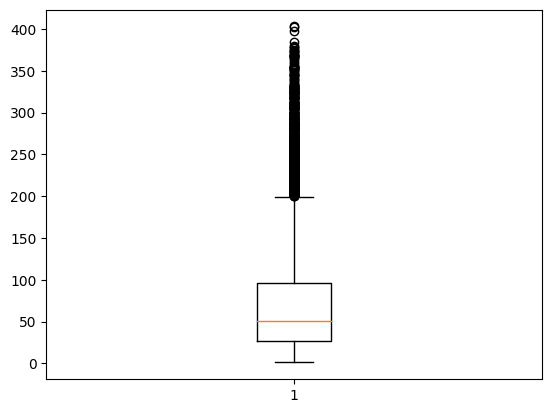

In [ ]:
plt.boxplot(a)

Qu'est-ce qu'on remarque ?


## 1.2 - Jointure des dataframes

1.2.1 - products & transactions

In [ ]:
# Jointure entre transactions et products en prenant comme clé la colonne 'id_prod'
# jointure externe
# afin de conserver toutes les lignes de mon fichier transactions.

df_final = pd.merge(transactions,products, on = 'id_prod', how= 'outer', indicator = True)

In [ ]:
df_final

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0.0,both
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0.0,both
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0.0,both
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0.0,both
...,...,...,...,...,...,...,...
679349,0_1624,NaN,NaN,NaN,24.50,0.0,right_only
679350,2_86,NaN,NaN,NaN,132.36,2.0,right_only
679351,0_299,NaN,NaN,NaN,22.99,0.0,right_only
679352,0_510,NaN,NaN,NaN,23.66,0.0,right_only


In [ ]:
#regardons les cas où le produit n'est pas vendu

df_final[df_final._merge=="right_only"]

,id_prod,date,session_id,client_id,price,categ,_merge
679332,0_1016,NaN,NaN,NaN,35.06,0.0,right_only
679333,0_1780,NaN,NaN,NaN,1.67,0.0,right_only
679334,T_0,NaN,NaN,NaN,-1.00,0.0,right_only
679335,0_1062,NaN,NaN,NaN,20.08,0.0,right_only
679336,0_1119,NaN,NaN,NaN,2.99,0.0,right_only
679337,0_1014,NaN,NaN,NaN,1.15,0.0,right_only
679338,1_0,NaN,NaN,NaN,31.82,1.0,right_only
679339,0_1318,NaN,NaN,NaN,20.92,0.0,right_only
679340,0_1800,NaN,NaN,NaN,22.05,0.0,right_only
679341,0_1645,NaN,NaN,NaN,2.99,0.0,right_only


In [ ]:
print("les produits qui ne sont pas vendus",df_final[df_final._merge=="right_only"].id_prod.unique())

les produits qui ne sont pas vendus ['0_1016' '0_1780' 'T_0' '0_1062' '0_1119' '0_1014' '1_0' '0_1318'
 '0_1800' '0_1645' '0_322' '0_1620' '0_1025' '2_87' '1_394' '2_72' '0_310'
 '0_1624' '2_86' '0_299' '0_510' '0_2308']


In [ ]:
#on supprime les produits invendus

index = df_final[df_final._merge=="right_only"].index

index

Int64Index([679332, 679333, 679334, 679335, 679336, 679337, 679338, 679339,
            679340, 679341, 679342, 679343, 679344, 679345, 679346, 679347,
            679348, 679349, 679350, 679351, 679352, 679353],
           dtype='int64')

In [ ]:
df_final.drop(index, inplace = True)

In [ ]:
#regardons les cas où le produit dans transaction n'est pas trouvé dans products
df_final[df_final._merge=="left_only"].describe(include="all")

,id_prod,date,session_id,client_id,price,categ,_merge
count,221,221,221,221,0.0,0.0,221
unique,1,221,221,100,NaN,NaN,1
top,0_2245,2022-09-23 07:22:38.636773,s_272266,c_1533,NaN,NaN,left_only
freq,221,1,1,6,NaN,NaN,221
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_final[df_final._merge=="left_only"].describe(include = "all")

,id_prod,date,session_id,client_id,price,categ,_merge
count,221,221,221,221,0.0,0.0,221
unique,1,221,221,100,NaN,NaN,1
top,0_2245,2022-09-23 07:22:38.636773,s_272266,c_1533,NaN,NaN,left_only
freq,221,1,1,6,NaN,NaN,221
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Un produit a été vendu 221 fois, mais on ne connait pas son prix.
Plusieurs possibilités :

    - on supprime les lignes -> on sous-estimera le CA
    
    - on fait une imputation

In [ ]:
# faisons une imputation

index = df_final[df_final._merge=="left_only"].index #on récupère l'index des lignes qu'il faut modifier

df_final.loc[index,"price"] = 11.7

df_final.loc[index,"categ"] = 0


In [ ]:
df_final[df_final._merge=="left_only"]

,id_prod,date,session_id,client_id,price,categ,_merge
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,11.7,0.0,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,11.7,0.0,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,11.7,0.0,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,11.7,0.0,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,11.7,0.0,left_only
...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,11.7,0.0,left_only
542777,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,11.7,0.0,left_only
542778,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,11.7,0.0,left_only
542779,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,11.7,0.0,left_only


### 1.2.1 - ajout de customers

In [ ]:
# faire la jointure

df_final = pd.merge(df_final,customers, on = 'client_id', how= 'outer', indicator = "_merge_2")

In [ ]:
# Vérifier si des ventes concernent des clients absents de customers
df_final


,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,_merge_2
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986,both
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986,both
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986,both
...,...,...,...,...,...,...,...,...,...,...
679350,NaN,NaN,NaN,c_7584,NaN,NaN,NaN,f,1960,right_only
679351,NaN,NaN,NaN,c_90,NaN,NaN,NaN,m,2001,right_only
679352,NaN,NaN,NaN,c_587,NaN,NaN,NaN,m,1993,right_only
679353,NaN,NaN,NaN,ct_1,NaN,NaN,NaN,m,2001,right_only


In [ ]:
# Vérifier si des clients n'ont fait aucun achat
df_final[df_final._merge_2 =="left_only"]


,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,_merge_2


In [ ]:
df_final[df_final._merge_2 =="right_only"]

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,_merge_2
679332,NaN,NaN,NaN,c_8253,NaN,NaN,NaN,f,2001,right_only
679333,NaN,NaN,NaN,c_3789,NaN,NaN,NaN,f,1997,right_only
679334,NaN,NaN,NaN,c_4406,NaN,NaN,NaN,f,1998,right_only
679335,NaN,NaN,NaN,ct_0,NaN,NaN,NaN,f,2001,right_only
679336,NaN,NaN,NaN,c_2706,NaN,NaN,NaN,f,1967,right_only
679337,NaN,NaN,NaN,c_3443,NaN,NaN,NaN,m,1959,right_only
679338,NaN,NaN,NaN,c_4447,NaN,NaN,NaN,m,1956,right_only
679339,NaN,NaN,NaN,c_3017,NaN,NaN,NaN,f,1992,right_only
679340,NaN,NaN,NaN,c_4086,NaN,NaN,NaN,f,1992,right_only
679341,NaN,NaN,NaN,c_6930,NaN,NaN,NaN,m,2004,right_only


In [ ]:
df_final[df_final._merge_2 =="right_only"].client_id.unique()

array(['c_8253', 'c_3789', 'c_4406', 'ct_0', 'c_2706', 'c_3443', 'c_4447',
       'c_3017', 'c_4086', 'c_6930', 'c_4358', 'c_8381', 'c_1223',
       'c_6862', 'c_5245', 'c_5223', 'c_6735', 'c_862', 'c_7584', 'c_90',
       'c_587', 'ct_1', 'c_3526'], dtype=object)

In [ ]:
ind = df_final[df_final._merge_2 =="right_only"].index

df_final.drop(ind,inplace=True) # df_final = df_final.drop(ind)

# 2 Analyse globale du CA

In [ ]:
df_final.head()

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,_merge_2
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986,both
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986,both
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986,both


In [ ]:
# calculer le CA total

df_final.price.sum()

11856314.38

In [ ]:
ind = df_final[df_final.date.str.startswith('test')].index

In [ ]:
df_final = df_final.drop(ind)

## 2.1 Traitement de la date

On aimerait pouvoir faire des analyses du CA par an, par mois, par jour de la semaine, par catégorie de produit.
On s'occupera des analyses des usages de clients dans le chapitre 3

On a besoin de traiter la date pour pouvoir faire ces analyses.
On va créer des nouvelles colonnes à parti de ce champ

In [ ]:
# Modification du type de ma colonne date
df_final['date'] = pd.to_datetime(df_final['date'])

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679332 non-null  float64       
 5   categ       679332 non-null  float64       
 6   _merge      679332 non-null  category      
 7   sex         679332 non-null  object        
 8   birth       679332 non-null  int64         
 9   _merge_2    679332 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 47.9+ MB


In [ ]:
df_final['année'] = df_final['date'].dt.year

In [ ]:
df_final.head()

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,_merge_2,année
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,both,2022
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,both,2021
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986,both,2022
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986,both,2022
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986,both,2021


En vous inspirant de ce qu'on vient de faire, créer :

    un champ mois

    un champ jour du mois

    un champ jour de la semaine


In [ ]:
# A vous de jouer

df_final['mois'] = df_final['date'].dt.month_name()
df_final['semaine'] = df_final['date'].dt.week
df_final['jour_mois'] = df_final['date'].dt.day
df_final['jour_semaine'] = df_final['date'].dt.day_name()

<ipython-input-310-913381ec562c>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_final['semaine'] = df_final['date'].dt.week


In [ ]:
df_final

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,_merge_2,année,mois,semaine,jour_mois,jour_semaine
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,both,2022,May,20,20,Friday
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,both,2021,July,29,20,Tuesday
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986,both,2022,August,33,20,Saturday
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986,both,2022,June,24,18,Saturday
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986,both,2021,August,33,18,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,both,f,2001,both,2021,July,29,23,Friday
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,both,f,1960,both,2022,March,12,25,Friday
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,both,f,1960,both,2021,September,38,25,Saturday
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,both,m,1992,both,2021,March,10,11,Thursday


## 2.2 Analyse calendaire

In [ ]:
#Calcule du CA par année
df_final.groupby("année").price.sum()

année
2021    4771844.46
2022    6110085.81
2023     974384.11
Name: price, dtype: float64

<Axes: title={'center': 'CA par année'}, xlabel='année', ylabel='CA'>

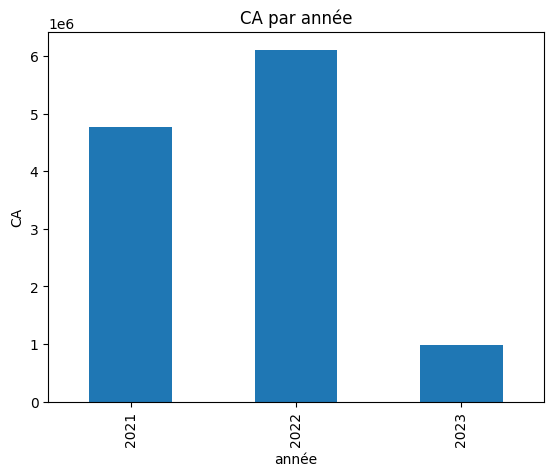

In [ ]:
df_final.groupby("année").price.sum().plot(kind = "bar", title="CA par année",ylabel="CA")

En vous inspirant de ce qu'on vient de faire :

- Etudier le CA par mois. Qu'observons nous ?

- Est-ce qu'il y a un effet fin de mois ? ou début de mois ?

- Est-ce qu'il y a un effet WE?





<Axes: title={'center': 'Evolution du CA'}, xlabel='année,mois', ylabel='€'>

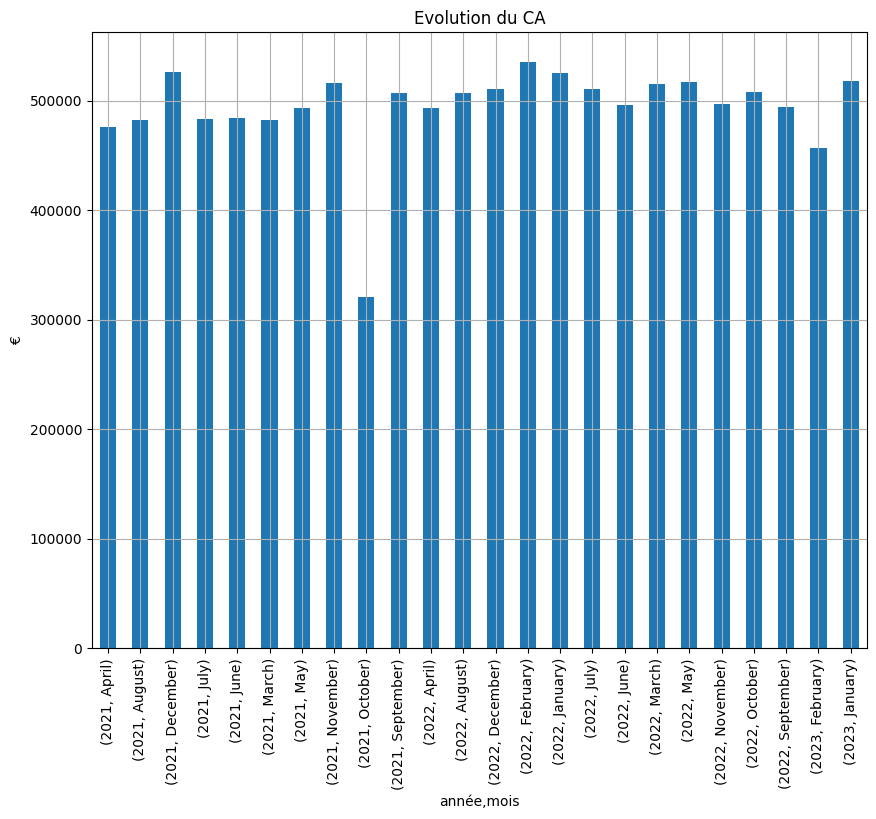

In [ ]:
# A vous de jouer

df_final.groupby(["année", "mois"]).price.sum().plot(kind="bar", title="Evolution du CA",ylabel="€",figsize =(10,8), grid=True)



<Axes: title={'center': "nombre d'achats moyen par jour du mois"}, xlabel='jour_mois'>

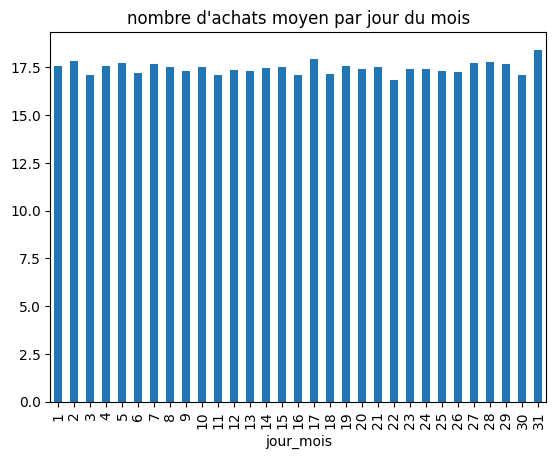

In [ ]:
df_final.groupby("jour_mois").price.mean().plot(kind="bar", title ="nombre d'achats moyen par jour du mois")

<Axes: xlabel='jour_mois'>

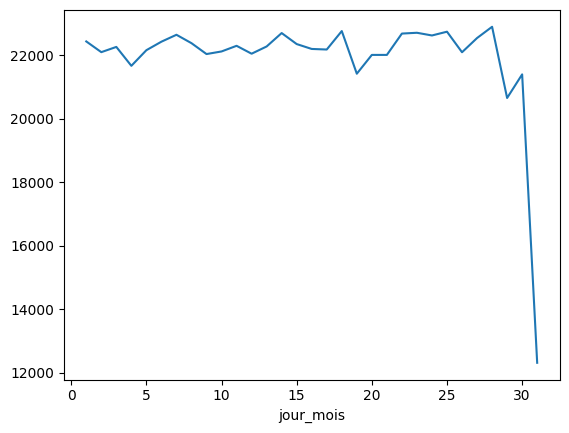

In [ ]:
df_final.groupby("jour_mois").price.count().plot()

<Axes: title={'center': "nombre d'achats moyen par jour de semaine"}, xlabel='jour_semaine'>

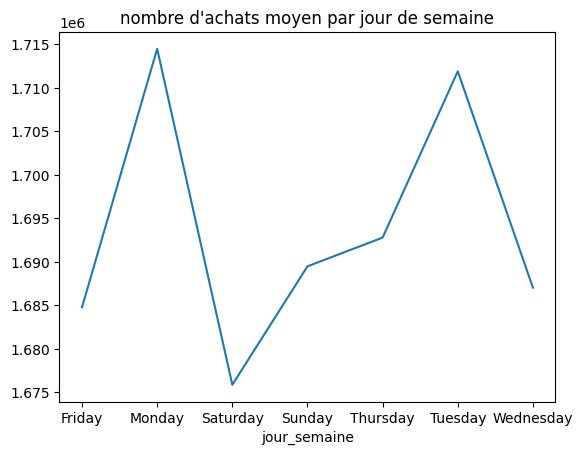

In [ ]:
df_final.groupby("jour_semaine").price.sum().plot(title ="nombre d'achats moyen par jour de semaine")

<Axes: title={'center': "nombre d'achats moyen par jour de semaine"}, xlabel='jour_semaine'>

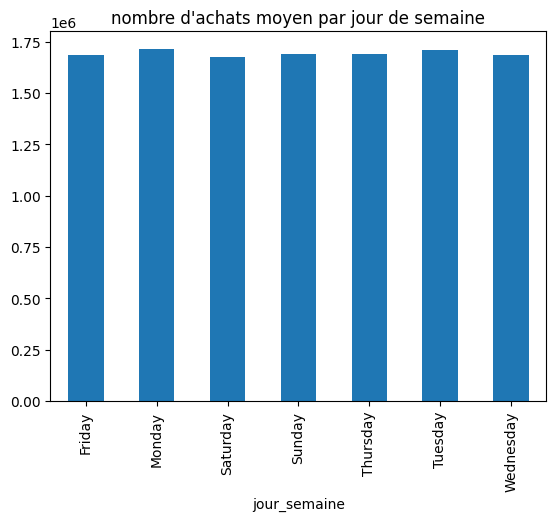

In [ ]:
df_final.groupby("jour_semaine").price.sum().plot(kind = "bar",title ="nombre d'achats moyen par jour de semaine")

## 2.3 Analyse par catégorie



In [ ]:
# reprendre le travail ci-dessous et le détailler par categorie


tcd_mois = pd.pivot_table(df_final, index = ['année','mois'], columns = 'categ', values = 'price',aggfunc={'price':'sum'})

In [ ]:
tcd_mois

categ                  0.0        1.0        2.0
année mois                                      
2021  April      205386.26  156138.35  114748.49
      August     167842.92  162991.38  151555.79
      December   206118.14  251026.75   68854.29
      July       144797.59  188523.27  149561.34
      June       168025.05  189162.04  126983.37
      March      193734.47  186974.17  101837.27
      May        196280.32  165893.40  130863.35
      November   156026.56  252910.39  107347.78
      October    199332.73   33762.32   87785.59
      September  246494.31  190613.78   70272.99
2022  April      175161.06  195263.97  122737.71
      August     177466.36  211360.09  117734.42
      December   180540.90  205945.71  123803.09
      February   183326.03  213120.64  139253.53
      January    164269.01  256267.92  104860.56
      July       187237.40  193969.72  129716.40
      June       184016.76  201912.06  110169.20
      March      191593.64  206485.26  117506.33
      May        195059.54  205532.63  116727.63
      November   184723.05  200427.99  111642.60
      October    187546.17  199609.66  120878.94
      September  183434.54  195379.54  115405.75
2023  February   162538.90  180347.24  113875.52
      January    181364.96  210104.41  126153.08

<Axes: title={'center': 'Evolution du CA par mois et par catégorie'}, xlabel='année,mois'>

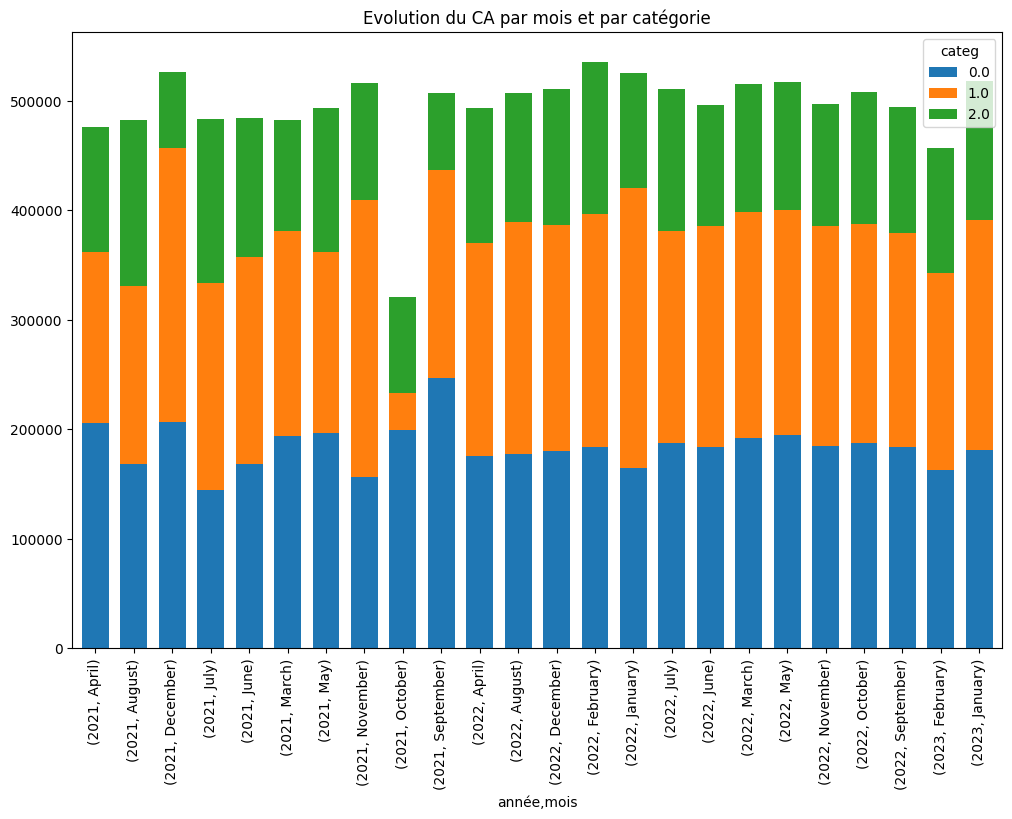

In [ ]:
tcd_mois.plot(kind='bar',stacked = True,figsize=(12,8),width = 0.7, title ='Evolution du CA par mois et par catégorie')

In [ ]:
tcd_jour =pd.pivot_table(df_final, index = ['jour_semaine'], columns = 'categ', values = 'price',aggfunc={'price':'mean'})

<Axes: title={'center': 'Evolution du CA par jour du mois et par catégorie'}, xlabel='jour_semaine'>

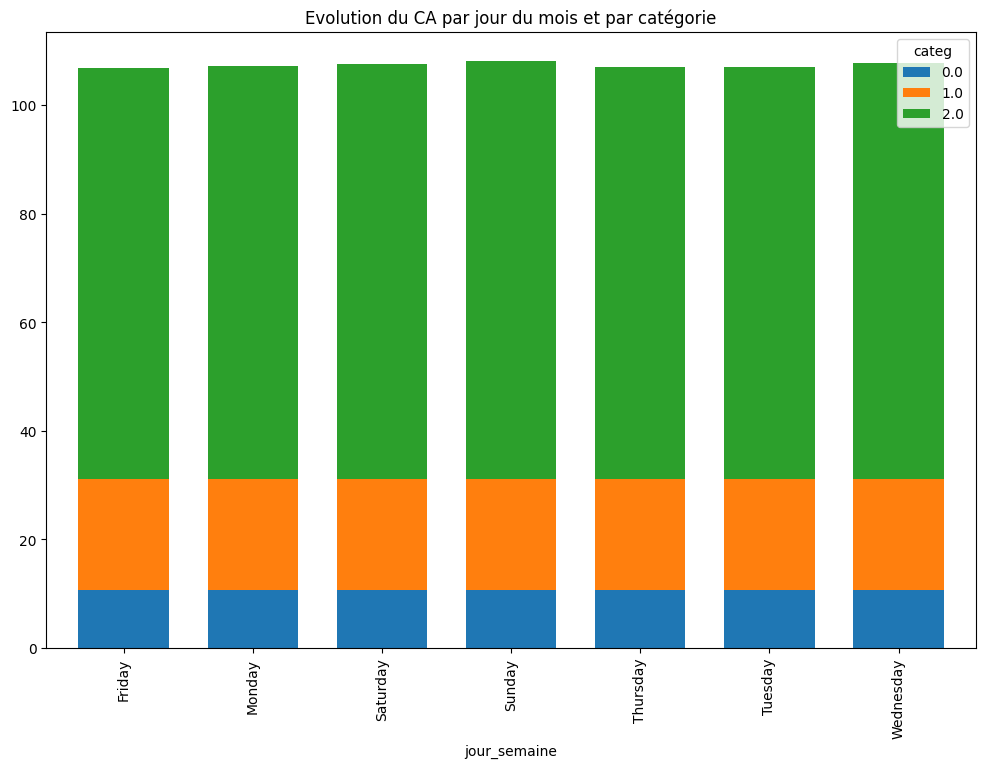

In [ ]:
tcd_jour.plot(kind='bar',stacked = True,figsize=(12,8),width = 0.7, title ='Evolution du CA par jour du mois et par catégorie')

# 3 Analyse des usages des clients

## 3.1 Traitement de l'âge

In [ ]:
#créons  une colonne âge
df_final['Age'] = 2023 - df_final['birth']

Text(0, 0.5, 'Nombre de clients')

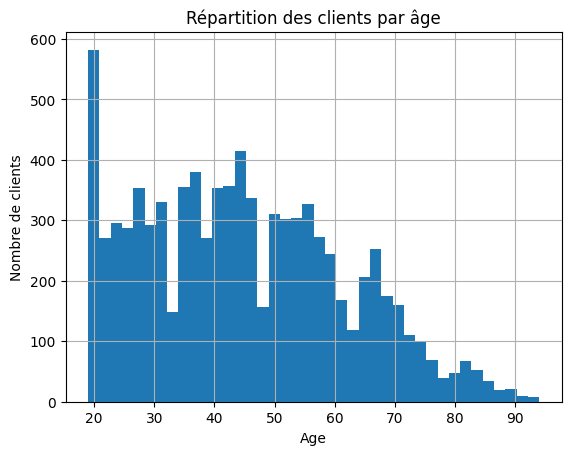

In [ ]:
df_final.groupby("client_id").Age.mean().hist(bins=40)

plt.title("Répartition des clients par âge")

plt.xlabel("Age")

plt.ylabel("Nombre de clients")

Pour analyser les usages liés à l'âge, il est souvent plus pertinent de faire des tranches d'âge



In [ ]:
# On va créer 14 intervalles d'âges :

labels = ['19-24','25-29','30-35','36-40','41-45','46-51','52-56','57-61','62-67','68-72','73-77','78-83','84-88','89-94']


df_final['Age_tranche']= pd.cut(df_final['Age'], 14,labels=labels)

In [ ]:
df_final

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,_merge_2,année,mois,semaine,jour_mois,jour_semaine,Age,Age_tranche
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,both,2022,May,20,20,Friday,37,36-40
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,both,2021,July,29,20,Tuesday,37,36-40
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986,both,2022,August,33,20,Saturday,37,36-40
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986,both,2022,June,24,18,Saturday,37,36-40
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986,both,2021,August,33,18,Wednesday,37,36-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,both,f,2001,both,2021,July,29,23,Friday,22,19-24
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,both,f,1960,both,2022,March,12,25,Friday,63,62-67
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,both,f,1960,both,2021,September,38,25,Saturday,63,62-67
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,both,m,1992,both,2021,March,10,11,Thursday,31,30-35


## 3.2 Analyse du chiffre d'affaires par client

In [ ]:
# le nombre de clients uniques
df_final.client_id.value_counts().shape

(8600,)

In [ ]:
# on regroupe mes données par client_id et on calcul le montant de leurs achats.
df_client = df_final.groupby('client_id')[['price']].sum();
df_client.head()

,price
client_id,
c_1,558.18
c_10,1353.60
c_100,254.85
c_1000,2261.89
c_1001,1812.86


Analyser le chiffre d'affaires par client :

- est ce qu'il y a des outliers ?
- si oui, quelle part du CA ils représentent ?
- que peut-on supposer à leur sujet ? Comment les traiter dans notre analyse
- étudier la distribution du CA par client en dehors de ces clients

In [ ]:
# A vous de jouer

ind = df_client.sort_values("price",ascending = False).head(4).index

In [ ]:
ca_pro = df_final [df_final.client_id.isin(ind)].price.sum()

In [ ]:
ca_pro

881135.8400000001

In [ ]:
ca_pro/ df_final.price.sum() *100

7.431785390967341

In [ ]:
df_final_2 = df_final [~df_final.client_id.isin(ind)]

## 3.3 Analyse des usages d'achat liés au sexe

### 3.3.1 Calculer le CA par sexe

In [ ]:
# A vous de jouer

df_final_2.groupby("sex").price.sum()

sex
f    5707382.91
m    5267795.63
Name: price, dtype: float64

### 3.3.2 Corrélation : Sexe et Catégorie

Les deux variables sont qualitatives.
On va réaliser le test du Khi² pour vérifier si ces deux variables sont liées.

In [ ]:
# Création de ma table de contingence
X = "sex"
Y = "categ"

cont_1 = df_final_2[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

categ,0.0,1.0,2.0,Total
sex,,,,
f,200904,111331,16980,329215
m,186589,101017,15868,303474
Total,387493,212348,32848,632689


In [ ]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(df_final)
indep = round(tx.dot(ty) / n)

In [ ]:
indep

categ,0.0,1.0,2.0,Total
sex,,,,
f,187785.0,102907.0,15919.0,306611.0
m,173102.0,94861.0,14674.0,282637.0
Total,360888.0,197768.0,30593.0,589249.0


In [ ]:
360888.0/589249.0

0.6124541577499495

In [ ]:
197768.0/589249.0

0.3356272136227639

In [ ]:
30593.0/589249.0

0.0519186286272866

In [ ]:
# regardons où l'écart est le plus important
(cont_1 - indep)/indep

categ,0.0,1.0,2.0,Total
sex,,,,
f,0.069862,0.081860,0.066650,0.073722
m,0.077914,0.064895,0.081368,0.073724
Total,0.073721,0.073723,0.073710,0.073721


In [ ]:
# importons le module chi2_contingency de la librairie scipy pour faire un chi2
from scipy.stats import chi2_contingency as chi2_contingency

In [ ]:
chi2, p, dof, expected_freq= chi2_contingency(cont_1)

In [ ]:
chi2

20.200173796862927

In [ ]:
p

0.002551063708568263

Avec une p-value inférieure à 0.05% on peut rejeter l'hypothèse 0 d'indépendance.

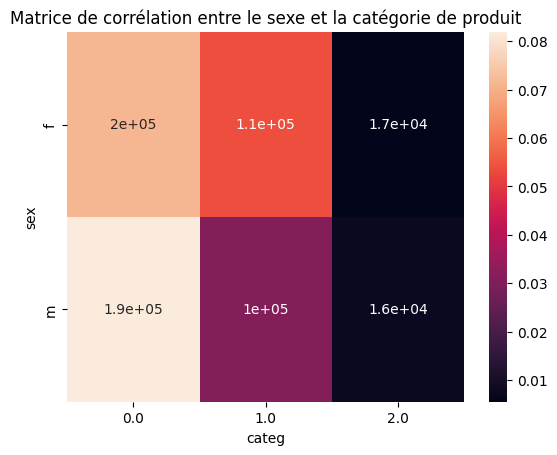

In [ ]:
import seaborn as sns


c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le sexe et la catégorie de produit')
plt.show()

On remarque une forte corrélation entre les hommes et la catégorie 1.

### 3.3.3 Test de corrélation : sexe et nombre d'achats

In [ ]:
nb_achats = df_final_2.groupby(["client_id","sex"],as_index=False)[["session_id"]].count()

array([<Axes: title={'center': 'f'}>, <Axes: title={'center': 'm'}>],
      dtype=object)

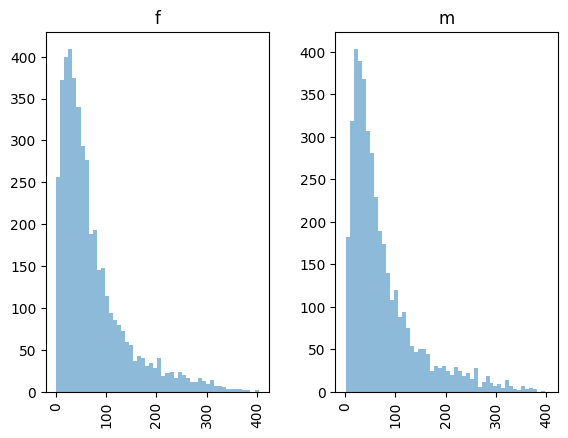

In [ ]:
nb_achats[['sex','session_id']].hist(by='sex',alpha = 0.5, bins = 50, sharex=True)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
lm = ols('session_id ~ sex', data = nb_achats).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)

In [ ]:
table

,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,6.660189e+01,66.601895,0.014453,0.904311
Residual,8594.0,3.960213e+07,4608.113532,NaN,NaN


In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             session_id   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01445
Date:                Wed, 28 Jun 2023   Prob (F-statistic):              0.904
Time:                        13:32:31   Log-Likelihood:                -48452.
No. Observations:                8596   AIC:                         9.691e+04
Df Residuals:                    8594   BIC:                         9.692e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.5183      1.014     72.473      0.000      71.530      75.507
sex[T.m]       0.1762      1.466      0.120      0.904      -2.697       3.049
==============================================================================
Omnibus:                     2829.583   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8012.605
Skew:                           1.762   Prob(JB):                         0.00
Kurtosis:                       6.156   Cond. No.                         2.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.4 Analyse des usages d'achat liés à l'âge¶

### 3.4.1 Corrélation âge et CA

On peut considérer l'âge comme une variable quantitative. Le CA l'est aussi.

In [ ]:
df_age_ca = df_final_2[['Age','price']]

In [ ]:
df_age_ca = df_age_ca.groupby('Age').agg({'price':'sum'}).reset_index()

In [ ]:
df_age_ca

,Age,price
0,19,609013.69
1,20,178195.78
2,21,184212.45
3,22,178497.70
4,23,165031.38
...,...,...
71,90,5266.05
72,91,5043.19
73,92,2815.45
74,93,4013.87


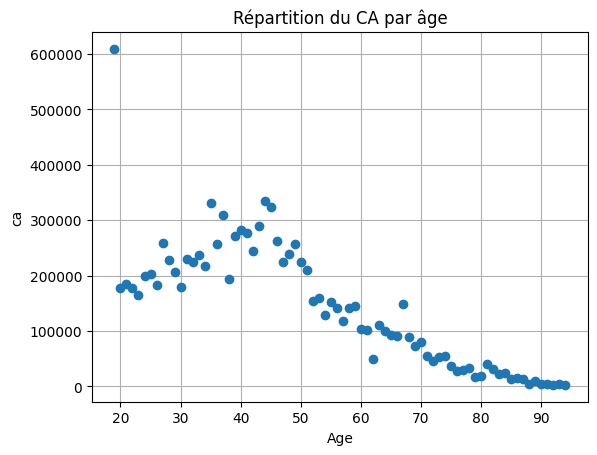

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_age_ca["Age"],df_age_ca["price"],'o')
plt.xlabel("Age")
plt.ylabel("ca")
plt.grid()
plt.title('Répartition du CA par âge')
plt.show()

In [ ]:
#corrélation de pearson
df_age_ca.corr()

,Age,price
Age,1.000000,-0.830594
price,-0.830594,1.000000


In [ ]:
#test sperman
from scipy import stats
from scipy.stats import spearmanr

In [ ]:
stats.spearmanr(df_age_ca['Age'],df_age_ca['price'])

SignificanceResult(statistic=-0.8736842105263158, pvalue=7.352708223159905e-25)

In [ ]:
df_age_ca.corr( method = "spearman")

,Age,price
Age,1.000000,-0.873684
price,-0.873684,1.000000


### 3.4.2 corrélation tranche d'âge et catégorie de produit

In [ ]:
#A vous de jouer

# Création de ma table de contingence
X = 'Age_tranche'
Y = "categ"

cont_2 = df_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_2

categ,0.0,1.0,2.0,Total
Age_tranche,,,,
19-24,8605,16110,18300,43015
25-29,5813,9897,10763,26473
30-35,60527,21475,4441,86443
36-40,75737,23497,320,99554
41-45,103954,31570,461,135985
46-51,81656,25547,383,107586
52-56,27147,32044,723,59914
57-61,15614,20410,309,36333
62-67,15491,19485,349,35325


In [ ]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_2.loc[:,["Total"]]
ty = cont_2.loc[["Total"],:]
n = len(df_final)
indep = round(tx.dot(ty) / n)

indep

categ,0.0,1.0,2.0,Total
Age_tranche,,,,
19-24,26321.0,14384.0,2310.0,43015.0
25-29,16199.0,8853.0,1422.0,26473.0
30-35,52894.0,28907.0,4642.0,86443.0
36-40,60917.0,33291.0,5346.0,99554.0
41-45,83209.0,45473.0,7303.0,135985.0
46-51,65831.0,35977.0,5778.0,107586.0
52-56,36661.0,20035.0,3218.0,59914.0
57-61,22232.0,12150.0,1951.0,36333.0
62-67,21615.0,11813.0,1897.0,35325.0


In [ ]:
# regardons où l'écart est le plus important
(cont_2 - indep)/indep*100

categ,0.0,1.0,2.0,Total
Age_tranche,,,,
19-24,-67.307473,11.999444,692.207792,0.0
25-29,-64.115069,11.792613,656.891702,0.0
30-35,14.430748,-25.710036,-4.330030,0.0
36-40,24.328184,-29.419363,-94.014216,0.0
41-45,24.931197,-30.574187,-93.687526,0.0
46-51,24.038827,-28.990744,-93.371409,0.0
52-56,-25.951283,59.940105,-77.532629,0.0
57-61,-29.767902,67.983539,-84.161968,0.0
62-67,-28.332177,64.945399,-81.602530,0.0


In [ ]:
chi2, p, dof, exp = chi2_contingency(cont_2)

In [ ]:
chi2

273034.1688454285

In [ ]:
p

0.0

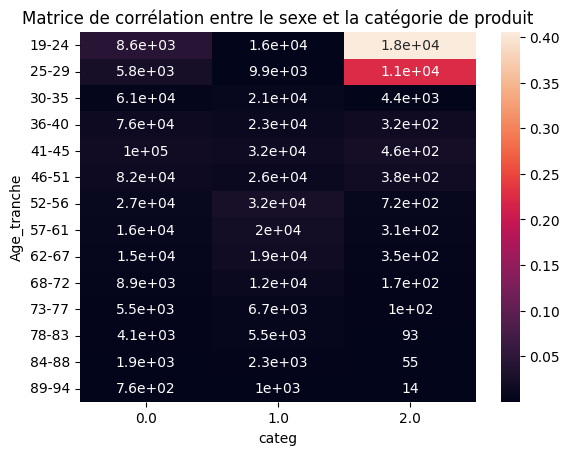

In [ ]:
c = cont_2.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le sexe et la catégorie de produit')
plt.show()

La catégorie 2 est très populaire chez les jeunes

### 3.4.3 corrélation tranche d'âge et fréquence d'achat

In [ ]:
df_freq_age = df_final.groupby(["Age_tranche","année","mois"]).agg({"client_id":"nunique",'session_id':"count"})

df_freq_age = pd.DataFrame(df_freq_age).reset_index()

In [ ]:
df_freq_age ["nb_achats"] = df_freq_age ["session_id"]/ df_freq_age ["client_id"]

In [ ]:
df_freq_age

,Age_tranche,année,mois,client_id,session_id,nb_achats
0,19-24,2021,April,574,1711,2.980836
1,19-24,2021,August,603,1897,3.145937
2,19-24,2021,December,536,1717,3.203358
3,19-24,2021,February,0,0,NaN
4,19-24,2021,January,0,0,NaN
...,...,...,...,...,...,...
499,89-94,2023,March,0,0,NaN
500,89-94,2023,May,0,0,NaN
501,89-94,2023,November,0,0,NaN
502,89-94,2023,October,0,0,NaN


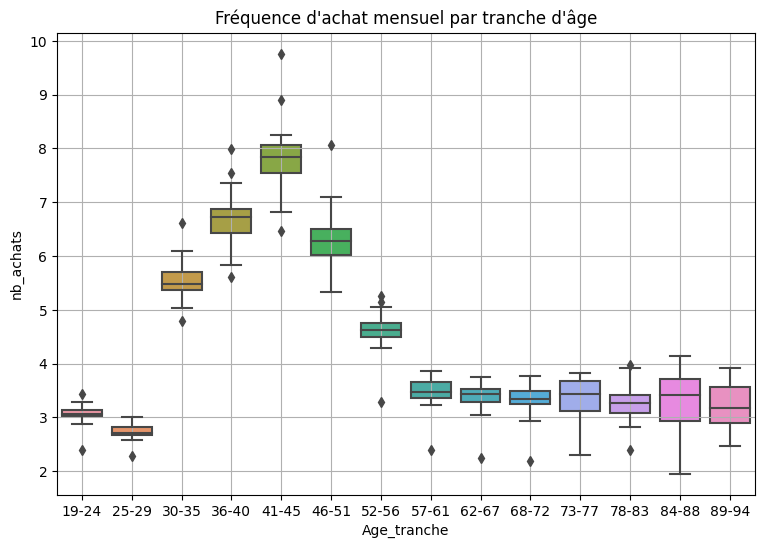

In [ ]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='Age_tranche',y="nb_achats",data=df_freq_age, showfliers=True)
plt.title('Fréquence d\'achat mensuel par tranche d\'âge')
plt.grid()
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
lm = ols('nb_achats ~ Age_tranche', data = df_freq_age).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)

In [ ]:
table

,df,sum_sq,mean_sq,F,PR(>F)
Age_tranche,13.0,817.479759,62.883058,375.095402,1.219294e-185
Residual,322.0,53.981853,0.167646,NaN,NaN


In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              nb_achats   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     375.1
Date:                Wed, 28 Jun 2023   Prob (F-statistic):          1.22e-185
Time:                        14:01:09   Log-Likelihood:                -169.58
No. Observations:                 336   AIC:                             367.2
Df Residuals:                     322   BIC:                             420.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.0622      0.084     36.639      0.000       2.898       3.227
Age_tranche[T.25-29]    -0.3300      0.118     -2.792      0.006      -0.563      -0.097
Age_tranche[T.30-35]     2.4573      0.118     20.790      0.000       2.225       2.690
Age_tranche[T.36-40]     3.6114      0.118     30.554      0.000       3.379       3.844
Age_tranche[T.41-45]     4.7512      0.118     40.197      0.000       4.519       4.984
Age_tranche[T.46-51]     3.2398      0.118     27.410      0.000       3.007       3.472
Age_tranche[T.52-56]     1.5455      0.118     13.076      0.000       1.313       1.778
Age_tranche[T.57-61]     0.4247      0.118      3.593      0.000       0.192       0.657
Age_tranche[T.62-67]     0.3059      0.118      2.588      0.010       0.073       0.538
Age_tranche[T.68-72]     0.2472      0.118      2.092      0.037       0.015       0.480
Age_tranche[T.73-77]     0.3021      0.118      2.556      0.011       0.070       0.535
Age_tranche[T.78-83]     0.2236      0.118      1.892      0.059      -0.009       0.456
Age_tranche[T.84-88]     0.2670      0.118      2.259      0.025       0.034       0.500
Age_tranche[T.89-94]     0.1665      0.118      1.409      0.160      -0.066       0.399
==============================================================================
Omnibus:                       35.372   Durbin-Watson:                   2.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.099
Skew:                           0.071   Prob(JB):                     7.11e-43
Kurtosis:                       6.721   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Avec un R_squared de 0.93, on peut dire qu'il existe à priori une relation entre l'âge et la fréquence d'achats.

Avec un p-value inférieure à 0.05%, on peut rejeter l'hypothèse H0

### 3.4.4 corrélation tranche d'âge et Panier moyen

In [ ]:
df_panier_age = df_final.groupby(["Age_tranche","année","mois"]).agg({"price":"sum",'session_id':"count"})

df_panier_age = pd.DataFrame(df_panier_age).reset_index()

In [ ]:
df_panier_age["panier"] = df_panier_age["price"] /df_panier_age["session_id"]

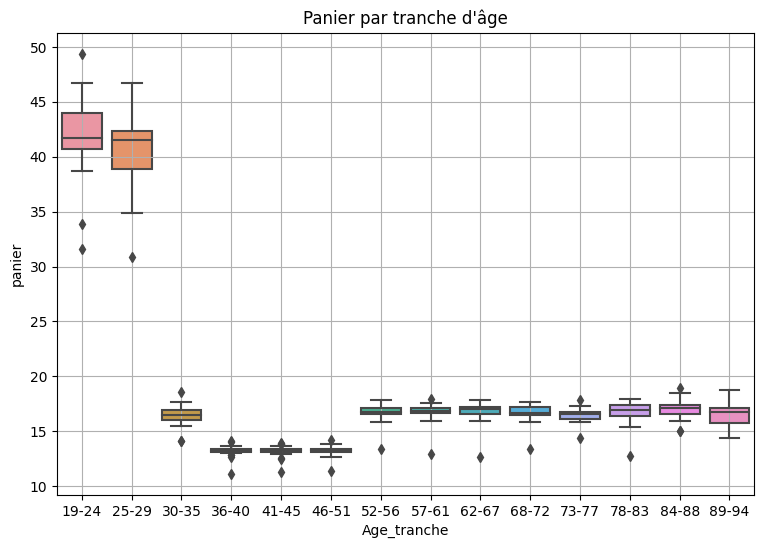

In [ ]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='Age_tranche',y='panier',data=df_panier_age, showfliers=True)
plt.title('Panier par tranche d\'âge')
plt.grid()
plt.show()

In [ ]:
lm_1 = ols('panier ~ Age_tranche', data = df_panier_age).fit()
import statsmodels.api;
table_1 = sm.stats.anova_lm(lm_1)

In [ ]:
table_1

,df,sum_sq,mean_sq,F,PR(>F)
Age_tranche,13.0,27462.289611,2112.483816,859.424918,4.833426e-241
Residual,322.0,791.482507,2.458020,NaN,NaN


In [ ]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 panier   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     859.4
Date:                Wed, 28 Jun 2023   Prob (F-statistic):          4.83e-241
Time:                        14:03:32   Log-Likelihood:                -620.71
No. Observations:                 336   AIC:                             1269.
Df Residuals:                     322   BIC:                             1323.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               41.8958      0.320    130.913      0.000      41.266      42.525
Age_tranche[T.25-29]    -1.1601      0.453     -2.563      0.011      -2.051      -0.270
Age_tranche[T.30-35]   -25.4422      0.453    -56.215      0.000     -26.333     -24.552
Age_tranche[T.36-40]   -28.7099      0.453    -63.435      0.000     -29.600     -27.819
Age_tranche[T.41-45]   -28.6928      0.453    -63.397      0.000     -29.583     -27.802
Age_tranche[T.46-51]   -28.6823      0.453    -63.374      0.000     -29.573     -27.792
Age_tranche[T.52-56]   -25.1968      0.453    -55.673      0.000     -26.087     -24.306
Age_tranche[T.57-61]   -25.1717      0.453    -55.617      0.000     -26.062     -24.281
Age_tranche[T.62-67]   -25.1297      0.453    -55.525      0.000     -26.020     -24.239
Age_tranche[T.68-72]   -25.2712      0.453    -55.837      0.000     -26.162     -24.381
Age_tranche[T.73-77]   -25.4371      0.453    -56.204      0.000     -26.327     -24.547
Age_tranche[T.78-83]   -25.1578      0.453    -55.587      0.000     -26.048     -24.267
Age_tranche[T.84-88]   -24.9052      0.453    -55.028      0.000     -25.796     -24.015
Age_tranche[T.89-94]   -25.3951      0.453    -56.111      0.000     -26.286     -24.505
==============================================================================
Omnibus:                      178.388   Durbin-Watson:                   2.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3461.950
Skew:                          -1.736   Prob(JB):                         0.00
Kurtosis:                      18.337   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Avec un p-value inférieur à 0.05 %, on peut rejeter l'hypothèse H0 et un Eta² de 0.970 indique une forte corrélation entre les variables.


# 4 synthèse

- il y a légérement plus de femmes que d'hommes (52%)
- l'âge moyen des clients est 44 ans
- Il y a 3 catégories de produit avec des itervalles de prix bien distincts

price categ

0 	11.727280

1 	25.531421

2 	108.354686

- les données de test (mise en service du site) ont été retirées de l'analyse
- un produit de la catégorie 0 vendu plus de 200 fois ne possède pas de fiche produit. On lui a imputé le prix moyen de 11,7
- le chiffre d'affaires total depuis la mise en ligne est de 11,8 millions
- 4 clients pros génèrent plus de 7% de ce chiffre d'affaires. Pour pas biaiser les analyses, ces clients particuliers ont été retirés
- en octobre 2021, on observe une chutte du CA due à la catégorie 1
- les produits de la catégorie 1 sont plus populaires chez les femmes
- les produits de la catégorie 2 sont très populaires chez les jeunes
- les fréquences d'achat sont plus importantes (2 fois) chez les 30 -50 ans
- le panier moyen est plus important chez les jeunes (plus de 2 fois)


